# Keras + Tensorflow implementation of handwritten digits recognition

Data from Kaggle Digit Recognition competition  
https://www.kaggle.com/c/digit-recognizer/data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


## Load data

In [2]:
train_file = 'train.csv'
test_file = 'test.csv'

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [3]:
train_df.head() # labels and pixels

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head() # no labels here

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So each row of the dataset is a sequence of ink intensity for the 784 pixels that represents square image with the size 28x28.

In [5]:
train_labels = train_df.label
train_images = train_df.iloc[:,1:]
test_images = test_df

## Show some digits from the input dataset

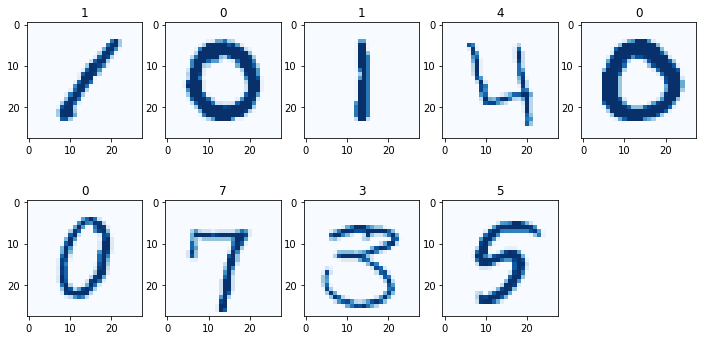

In [7]:
plt.figure(figsize=(12,6))
for i in range(0,9):
    plt.subplot(250 + (i+1))
    img = train_images.iloc[i,:].values.reshape(28, 28)
    plt.imshow(img, cmap='Blues')
    plt.title(train_labels[i])

## Preprocess data for NN

In [8]:
train_images = (train_images/train_images.max()).fillna(0) # normalize values
test_images = (test_images/test_images.max()).fillna(0) # normalize values
train_labels = pd.get_dummies(train_labels) # one-hot encoding of the label

In [9]:
train_labels.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


## Build simple 1-hidden layer dense NN
Some more information about Keras' Sequential models  
https://keras.io/getting-started/sequential-model-guide/

In [10]:
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

# Multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [12]:
# import pydot
# from keras.utils.visualize_util import plot
# plot(model, to_file='model.png')

## Train the model

In [14]:
print(train_images.values.shape)
print(train_labels.values.shape)

(42000, 784)
(42000, 10)


Let's fit the weights of our NN. To estimate overfitting, let's use validation dataset which we set up as 5% of the training dataset - validation_split = 0.05.

In [15]:
history=model.fit(train_images.values, train_labels.values, validation_split = 0.05, 
            nb_epoch=25, batch_size=64)

E:\IDE\WPy-3662\python-3.6.6.amd64\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 39900 samples, validate on 2100 samples
Epoch 1/25
39900/39900 [==============================] - 3s 81us/step - loss: 0.4539 - acc: 0.8785 - val_loss: 0.3141 - val_acc: 0.9143
Epoch 2/25
39900/39900 [==============================] - 3s 64us/step - loss: 0.2465 - acc: 0.9286 - val_loss: 0.2520 - val_acc: 0.9348
Epoch 3/25
39900/39900 [==============================] - 3s 70us/step - loss: 0.2031 - acc: 0.9421 - val_loss: 0.2269 - val_acc: 0.9424
Epoch 4/25
39900/39900 [==============================] - 3s 65us/step - loss: 0.1752 - acc: 0.9490 - val_loss: 0.2058 - val_acc: 0.9429
Epoch 5/25
39900/39900 [==============================] - 3s 67us/step - loss: 0.1562 - acc: 0.9545 - val_loss: 0.1911 - val_acc: 0.9481
Epoch 6/25
39900/39900 [==============================] - 3s 66us/step - loss: 0.1414 - acc: 0.9586 - val_loss: 0.1873 - val_acc: 0.9486
Epoch 7/25
39900/39900 [==============================] - 3s 71us/step - loss: 0.1306 - acc: 0.9613 - val_loss: 0.1816 - val_acc:

In [17]:
hist_df = pd.DataFrame(history.history)

In [18]:
hist_df.head()

,val_loss,val_acc,loss,acc
0,0.314067,0.914286,0.453909,0.878546
1,0.251983,0.934762,0.246468,0.928571
2,0.226936,0.942381,0.203141,0.942080
3,0.205757,0.942857,0.175246,0.948972
4,0.191095,0.948095,0.156158,0.954486


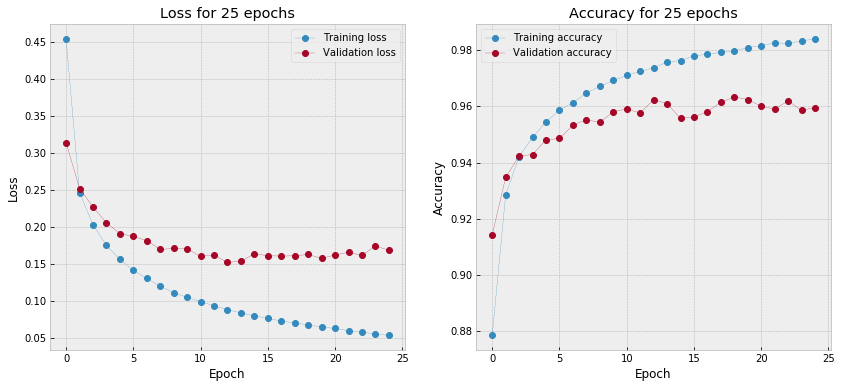

In [20]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.acc, label='Training accuracy', **params_dict)
plt.plot(hist_df.val_acc, label='Validation accuracy', **params_dict)
plt.title('Accuracy for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Some conclusions here: 
1. At some number of the epochs (8-10 in this case) the validation loss stops decreasing, i.e. the network begin to overfit. The training loss still decreases.
2. The same is true for the training/validation accuracy - validation accuracy stops increasing after some number of epochs.
3. Since validation data was not used for training, measuring accuracy on the the validation dataset gives us an estimation of the ability of the model to generalize.

Basically we tuned the only one parameter - number of epochs using validation.
Now I will use epochs=10.

In [21]:
# Predict on the whole dataset now, 10 epochs
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

# Multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images.values, train_labels.values, nb_epoch=10, batch_size=64)

E:\IDE\WPy-3662\python-3.6.6.amd64\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
42000/42000 [==============================] - 3s 69us/step - loss: 0.4778 - acc: 0.8690
Epoch 2/10
42000/42000 [==============================] - 3s 71us/step - loss: 0.2596 - acc: 0.9256
Epoch 3/10
42000/42000 [==============================] - 3s 67us/step - loss: 0.2147 - acc: 0.9383
Epoch 4/10
42000/42000 [==============================] - 3s 73us/step - loss: 0.1843 - acc: 0.9471
Epoch 5/10
42000/42000 [==============================] - 3s 77us/step - loss: 0.1621 - acc: 0.9524
Epoch 6/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.1459 - acc: 0.9574
Epoch 7/10
42000/42000 [==============================] - 3s 65us/step - loss: 0.1321 - acc: 0.9615
Epoch 8/10
42000/42000 [==============================] - 3s 62us/step - loss: 0.1219 - acc: 0.9647
Epoch 9/10
42000/42000 [==============================] - 3s 66us/step - loss: 0.1127 - acc: 0.9678
Epoch 10/10
42000/42000 [==============================] - 3s 67us/step - loss: 0.1060 - acc: 0.9693

## Predict test labels

In [22]:
pred_classes = model.predict_classes(test_images.values)

In [23]:
pred_classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [26]:
pred = pd.DataFrame({'ImageId': range(1, len(pred_classes)+1), 'Label': pred_classes})

In [27]:
pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [28]:
pred.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [30]:
pred.to_csv('subm06.csv', index=False)